# 01 Obtaining Data

This project came to be as a result that it caught our attention that in those countries that have fewer economic resources the number of environmental catastrophes (hurricanes, typhoons) seems higher than in those countries that enjoy financial success. This made us wonder if the presence of repeated natural disasters affects the economy of a country.

To find that out, we try to corroborate our hypothesis with data. In this book we describe how we accessed the data for this project.


In [70]:
import pandas as pd
import warnings

## 1.1 Nat. Disasters - Importing Data

https://www.kaggle.com/datasets/jnegrini/emdat19002021?resource=download
https://www.emdat.be/

We have obtained a dataset about naural disasters on [kaggle](https://www.kaggle.com/datasets/jnegrini/emdat19002021?resource=download). It contains information about natural disasters from 1900 to 2021. The data has been provided by [EM-DAT](https://www.emdat.be/), the Emergency Events Database. EM-DAT was created with the support of the World Health Organisation (WHO) and the Belgian Government. According to EM-DAT, the data is compiled from various sources, including UN agencies, non-governmental organisations, insurance companies, research institutes and press agencies.



In [71]:
raw_natural_disaster_df = pd.read_csv('data/all_natural_disasters.csv')

relevant_columns = ['Year', 'Disaster Subgroup', 'Disaster Type', 'Event Name', 'Country', 
'ISO', 'Region', 'Continent', 'Start Year', 'Start Month', 'Start Day','End Year', 'End Month', 'End Day','Total Deaths', 'Total Affected']

natural_disaster_df = raw_natural_disaster_df[relevant_columns]
natural_disaster_df.head()

,Year,Disaster Subgroup,Disaster Type,Event Name,Country,ISO,Region,Continent,Start Year,Start Month,Start Day,End Year,End Month,End Day,Total Deaths,Total Affected
0,1900,Climatological,Drought,NaN,Cabo Verde,CPV,Western Africa,Africa,1900,NaN,NaN,1900,NaN,NaN,11000.0,NaN
1,1900,Climatological,Drought,NaN,India,IND,Southern Asia,Asia,1900,NaN,NaN,1900,NaN,NaN,1250000.0,NaN
2,1902,Geophysical,Earthquake,NaN,Guatemala,GTM,Central America,Americas,1902,4.0,18.0,1902,4.0,18.0,2000.0,NaN
3,1902,Geophysical,Volcanic activity,Santa Maria,Guatemala,GTM,Central America,Americas,1902,4.0,8.0,1902,4.0,8.0,1000.0,NaN
4,1902,Geophysical,Volcanic activity,Santa Maria,Guatemala,GTM,Central America,Americas,1902,10.0,24.0,1902,10.0,24.0,6000.0,NaN


## 1.2 Nat. Disasters - Handling Columns

### 1.2.1 Star & End dates

Start and End Column swill be transformed to a duration column. This way it will be easier to identy events that took place over a longer time period.

To do that we will use the 'datetime' library from python. Two date objects were created. We subtracted then the start_date from end_date and a timedelta object was computed. The timedelta object gives back the unit of time wanted, in this case, days.

If the month or the day is not provided, then the first month of the year and the first day of the month will be assigned as a start date and the end month of the year and last day of the month will be assigned as end date.

Source:
https://docs.python.org/3/library/datetime.html#datetime.timedelta

In [72]:
natural_disaster_df.shape

(16126, 16)

In [73]:
from datetime import date
import math
import calendar

duration = []
for index, row in natural_disaster_df.iterrows():
    # date(year, month, day)
    start_year, start_month, start_day = row['Start Year'], row['Start Month'], row['Start Day']
    end_year, end_month, end_day = row['End Year'], row['End Month'], row['End Day']
    if math.isnan(start_month):
        start_month = 1
    if math.isnan(end_month):
        end_month = 12
    if math.isnan(start_day):
        start_day = 1
    if math.isnan(end_day): # get last day of a month
        # calendar.monthrange(year, month)
        # Returns a tuple with weekday of first day of the month and number of days in month, for the specified year and month.
        _, end_day = calendar.monthrange(int(end_year), int(end_month))
        end_day = int(end_day)

    try:
        start_date = date(int(start_year), int(start_month), int(start_day))
        end_date = date(int(end_year) , int(end_month), int(end_day))

    except ValueError as e: # Some rows did have incorrect days (months with less than 31 days were assigned 31 days).
        print(f"Error at {index}:")
        print(f"\t{int(start_year), int(start_month), int(start_day)}")
        print(f"\t{int(end_year) , int(end_month), int(end_day)}")
        # Assign correct day for end day:
        _, end_day = calendar.monthrange(int(end_year), int(end_month))
        end_day = int(end_day)

        # Assign correct day for start day:
        _, last_day = calendar.monthrange(int(start_year), int(start_month))
        if start_day > int(last_day):
            start_day = 1

        start_date = date(int(start_year), int(start_month), int(start_day))
        end_date = date(int(end_year) , int(end_month), int(end_day))

    delta = end_date - start_date
    duration.append(delta.days)

Error at 3998:
	(1992, 9, 31)
	(1992, 9, 31)
Error at 4536:
	(1992, 9, 8)
	(1992, 9, 31)
Error at 6203:
	(1996, 11, 1)
	(1997, 4, 31)
Error at 7164:
	(1998, 1, 1)
	(1998, 2, 31)
Error at 14434:
	(2017, 6, 1)
	(2017, 6, 31)


In [74]:
natural_disaster_df = natural_disaster_df.assign(Duration=duration)

In [75]:
# Drop columns that are no longer necessary:
natural_disaster_df = natural_disaster_df.drop(['Start Year', 'End Year', 'Start Month', 'End Month', 'Start Day', 'End Day'], axis=1)

In [76]:
natural_disaster_df.head()

,Year,Disaster Subgroup,Disaster Type,Event Name,Country,ISO,Region,Continent,Total Deaths,Total Affected,Duration
0,1900,Climatological,Drought,NaN,Cabo Verde,CPV,Western Africa,Africa,11000.0,NaN,364
1,1900,Climatological,Drought,NaN,India,IND,Southern Asia,Asia,1250000.0,NaN,364
2,1902,Geophysical,Earthquake,NaN,Guatemala,GTM,Central America,Americas,2000.0,NaN,0
3,1902,Geophysical,Volcanic activity,Santa Maria,Guatemala,GTM,Central America,Americas,1000.0,NaN,0
4,1902,Geophysical,Volcanic activity,Santa Maria,Guatemala,GTM,Central America,Americas,6000.0,NaN,0


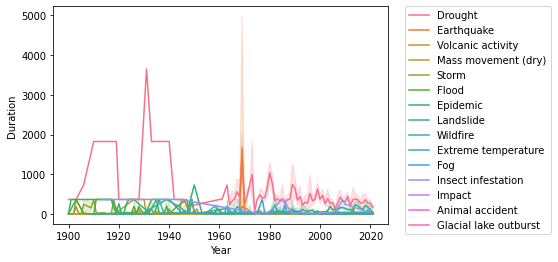

In [77]:
# Duration of disasters:
import seaborn as sns
import matplotlib.pyplot as plt
x =natural_disaster_df['Year']
y = natural_disaster_df['Duration']
hue = natural_disaster_df['Disaster Type']
sns.lineplot(x=x, y=y,
             hue=hue,
             data=natural_disaster_df)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

<AxesSubplot:xlabel='Duration', ylabel='Disaster Type'>

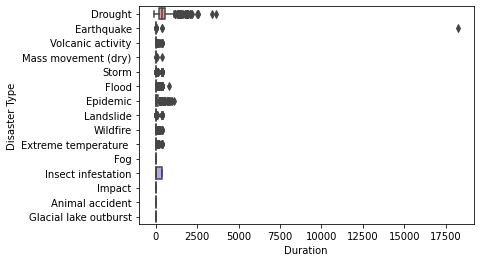

In [78]:
# It seems we have some outliers:

sns.boxplot(data=natural_disaster_df, x="Duration", y="Disaster Type")

In [79]:
# I had a particular interest in find which catastrophe has taken over 17500 days (almost 50 years). Probably outlier/mistake?
index_to_outlier = None
for idx, value in enumerate(natural_disaster_df['Duration']):
    if value > 17000:
        print(f"index {idx}")
        index_to_outlier = idx
        print(natural_disaster_df.iloc[idx])

index 15421
Year                            1969
Disaster Subgroup        Geophysical
Disaster Type             Earthquake
Event Name                       NaN
Country                      Morocco
ISO                              MAR
Region               Northern Africa
Continent                     Africa
Total Deaths                    11.0
Total Affected                   NaN
Duration                       18262
Name: 15421, dtype: object


This is clear an outlier due to a Mistake. After research, we found out it was an earthquake that took place in Morocco in 1969: https://en.wikipedia.org/wiki/1969_Portugal_earthquake

Its duration will be corrected to 1 day.

In [80]:
natural_disaster_df['Duration'].iat[index_to_outlier] = 1

<AxesSubplot:xlabel='Duration', ylabel='Disaster Type'>

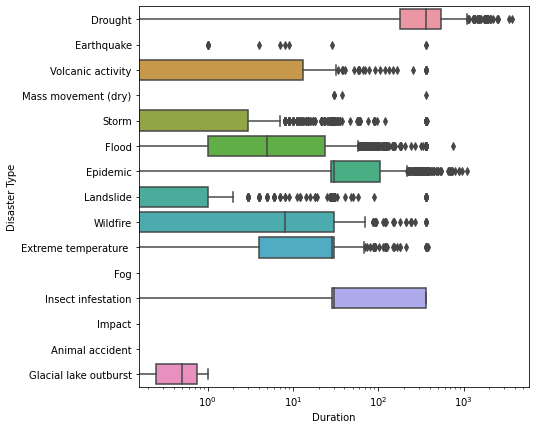

In [81]:
# It seems we have some outliers:
f, ax = plt.subplots(figsize=(7, 7))
ax.set(xscale="log")
sns.boxplot(data=natural_disaster_df, x="Duration", y="Disaster Type", ax=ax)

### 1.2.2 Disaster Subgroup & Type
- Subgroup becomes Group since Group contained the same value for each row (Natural)
- "Disaster" can be removed from the column names.

In [82]:
rename_dic = {'Disaster Subgroup' : 'Group', 'Disaster Type' : 'Type'}
natural_disaster_df = natural_disaster_df.rename(columns=rename_dic)
natural_disaster_df.head()

,Year,Group,Type,Event Name,Country,ISO,Region,Continent,Total Deaths,Total Affected,Duration
0,1900,Climatological,Drought,NaN,Cabo Verde,CPV,Western Africa,Africa,11000.0,NaN,364
1,1900,Climatological,Drought,NaN,India,IND,Southern Asia,Asia,1250000.0,NaN,364
2,1902,Geophysical,Earthquake,NaN,Guatemala,GTM,Central America,Americas,2000.0,NaN,0
3,1902,Geophysical,Volcanic activity,Santa Maria,Guatemala,GTM,Central America,Americas,1000.0,NaN,0
4,1902,Geophysical,Volcanic activity,Santa Maria,Guatemala,GTM,Central America,Americas,6000.0,NaN,0


<AxesSubplot:ylabel='Type'>

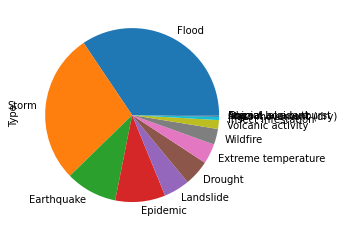

In [83]:
natural_disaster_df['Type'].value_counts().plot(kind='pie')

## 1.3 Nat. Disasters - Display Dataframe Info

In [84]:
natural_disaster_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16126 entries, 0 to 16125
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            16126 non-null  int64  
 1   Group           16126 non-null  object 
 2   Type            16126 non-null  object 
 3   Event Name      3861 non-null   object 
 4   Country         16126 non-null  object 
 5   ISO             16126 non-null  object 
 6   Region          16126 non-null  object 
 7   Continent       16126 non-null  object 
 8   Total Deaths    11413 non-null  float64
 9   Total Affected  11617 non-null  float64
 10  Duration        16126 non-null  int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 1.4+ MB


## 1.4 Nat. Disasters - Preparing for Merge

### 1.4.1 Dropping irrelevant Years
The Worldbank API only provides GDP's for the years 1960 to 2021. To test whether the events have an effect on the countries gdps the gdps from the year before, during as well as 3 years after the event will be used. That means that for this project only the years from 1961 to 2018 can be used.

In [85]:
drop_indexes = natural_disaster_df[(natural_disaster_df['Year'] < 1961)].index
drop_indexes = drop_indexes.append(natural_disaster_df[(natural_disaster_df['Year'] > 2018)].index)
nat_df = natural_disaster_df.drop(drop_indexes)

#nat_df['Year'].unique()
nat_df['Year'].value_counts()

2002    532
2000    523
2005    498
2007    449
2001    447
2006    446
2010    441
1999    416
2004    405
2008    400
2015    398
2003    392
2009    384
2017    371
2012    370
1998    363
2011    357
2013    353
2016    350
2014    348
2018    338
1997    323
1990    303
1995    277
1996    273
1993    267
1991    266
1994    255
1988    234
1992    232
1987    227
1983    206
1989    189
1985    175
1986    174
1984    156
1982    150
1981    146
1980    144
1977    141
1978    137
1979    122
1976     99
1966     84
1968     83
1969     83
1970     82
1967     80
1974     72
1965     68
1975     67
1973     65
1972     63
1964     63
1971     63
1963     44
1961     29
1962     29
Name: Year, dtype: int64

In [86]:
# Fixing Index
nat_df = nat_df.reset_index(drop=True)
nat_df.head()

,Year,Group,Type,Event Name,Country,ISO,Region,Continent,Total Deaths,Total Affected,Duration
0,1961,Meteorological,Storm,NaN,Bangladesh,BGD,Southern Asia,Asia,11000.0,NaN,0
1,1961,Meteorological,Storm,NaN,Bangladesh,BGD,Southern Asia,Asia,NaN,NaN,0
2,1961,Meteorological,Storm,NaN,Bangladesh,BGD,Southern Asia,Asia,266.0,NaN,30
3,1961,Meteorological,Storm,Hattie,Belize,BLZ,Central America,Americas,275.0,NaN,1
4,1961,Climatological,Drought,NaN,Canada,CAN,Northern America,Americas,NaN,NaN,364


### 1.4.2 Obtaining List of ISO Codes

In [87]:
# Getting all GDP's once per country
country_iso_codes = nat_df['ISO'].unique().tolist()
len(country_iso_codes)

227

## 1.5 GDP's - Testing API

## Requests
- GDP Definition: https://api.worldbank.org/v2/indicator/NY.GDP.MKTP.CD
- Getting GDP all: https://api.worldbank.org/v2/country/all/indicator/NY.GDP.MKTP.CD?page=1
- Getting GDP by Country ISO Code: https://api.worldbank.org/v2/country/cpv/indicator/NY.GDP.MKTP.CD?per_page=62
- Getting GDP for Certain Years: https://api.worldbank.org/v2/country/cpv/indicator/NY.GDP.MKTP.CD?date=1960:1964

In [88]:
import requests
import xml.etree.ElementTree as ET
from genericpath import exists

### 1.5.1 Testing Request and Handling XML Response

In [90]:
response = requests.get('https://api.worldbank.org/v2/country/cpv/indicator/NY.GDP.MKTP.CD?date=2000:2001')

root = ET.fromstring(response.content)

for child in root:
    print(child.tag)
    for subchild in child:
        print('\t', subchild.tag, subchild.text)

ParseError: mismatched tag: line 6, column 2 (<string>)

In [ ]:

for entry in root:
    numb = "{:,.2f}".format(float(entry.find('{http://www.worldbank.org}value').text))
    print(entry.find('{http://www.worldbank.org}date').text, ' : ',numb)

## 1.6 GDP's - Obtaining GDP's for all Countries & Save

In [ ]:
warnings.filterwarnings('ignore', category=FutureWarning)

# ONLY DO THIS STEP WHEN NECESSARY
# Duration ~ 45min
if (not exists('data/country_gdps.csv')):
    country_gpds_df = pd.DataFrame()
    error_isos = []

    # Iterate over iso codes and obtaining all gdp values for these countries
    for iso in country_iso_codes:
        try:
            url = f'https://api.worldbank.org/v2/country/{iso}/indicator/NY.GDP.MKTP.CD?per_page=62'
            response = requests.get(url)

            root = ET.fromstring(response.content)

            gdp_dict = {'iso' : iso}
            for entry in root:
                gdp_dict[entry.find('{http://www.worldbank.org}date').text] = entry.find('{http://www.worldbank.org}value').text

            country_gpds_df = country_gpds_df.append(gdp_dict, ignore_index=True)

        except:
            # Collecting list of iso codes the worldbank api does not list
            error_isos.append(iso)

    # Save to file
    error_df = pd.DataFrame(error_isos)
    error_df.to_csv('data/worldbank_iso_erros.csv')
    country_gpds_df.to_csv('data/country_gdps.csv')

else:
    country_gpds_df = pd.read_csv('data/country_gdps.csv', index_col=0)
    error_df = pd.read_csv('data/worldbank_iso_erros.csv', index_col=0)
    error_isos = error_df['0'].to_list()

country_gpds_df.head()


## 1.7 GDP's - Reviewing Errors
Taking a look at the countries the Wordlbank does not list GDPs for

In [ ]:
nat_df[nat_df['ISO'].isin(error_isos)][['ISO', 'Country']].drop_duplicates()

## 1.8 Nat. Disasters - Clean Up & Save
The Worldbank seems to not list GDP's for countries that do not exist anymore as well as countries that are extremely small with population sizes of less then 10000.

For now these countries are going to be excluded from the dataframe. The possibility remains to lookup the GDP manually for these countries should that be necessary.

In [ ]:
nat_df_reduced = nat_df.drop(nat_df[nat_df['ISO'].isin(error_isos)].index)
nat_df_reduced.info()

In [ ]:
nat_df_reduced.to_csv('data/all_natural_disasters_reduced.csv')